# <span style="color:darkblue"> Studying Average Lap Speed in F1  </span>

<font size = "4">

by Winnie Lau, Zoe Liu, Tashfia Noor

QTM 151 - Section 1

## Introduction

Formula 1, more widely known as F1, is a global racing competition that focuses on single-seater formula racing cars. The competitive race is known for its extreme g-force, high speeds and international reach. The circuits are where drivers will race, which are located around the world with classic locations in Japan and Belgium and newer additions in Miami and Las Vegas. Drivers come from varying skill levels from holding multiple championships to first-time experiences. A typical race usually lasts from an hour-and-a-half to two hours, composed of a set number of laps based on the circuit layout. F1 races usually have 10 teams competing, with 2 drivers per team. Each team utilizes a car that is associated with a specific company or company collaboration e.g., Mclaren Mercedes, which holds the highest team standing in the 2024 season, is a partnership between McLaren’s racing expertise and Mercedes’ engineering products. Here, we can also identify constructors by their nationality based on the company’s country of origin. Based on the available data, we were interested in investigating constructor nationality as a factor of race speed. The question we are thus researching based on the F1 datasets is: How does the fastest average lap speed differ by constructor nationality, and how does it change over time?

Results show an interesting pattern of fastestLapSpeed over time by constructor nationality, as seen by a decrease, followed by an increase, which we disucss in our discussion section. We begin by looking at the datasets and selecting the relevant columns to merge into a singular dataframe, such as constructorId and fastestLapSpeed, to answer our research question. We then clean the data for missing values and manipulate string-coded columns to numeric, when relevant. This is followed by an analysis into what the average fastestLapSpeed is, grouped by constructor nationality and year. From there, we graph the results to visualize how average fastestLapSpeed differs by constructor nationality and changes over time. The average fastestLapSpeeds are then calculated by constructor nationality, not separating by year, and the top 5 are extracted to create another graph that focuses in on the top constructor nationalities. We conclude with a discussion of the results and findings.

## Data Description

We will be using dataset tables `results`, `races`, and `constructors`. In the `results` table, each row represents the information for a result, including the race, driver, constructor, time, rank, and all other relevant details associated with the result. A total of 25840 rows of results are included in the table. The `races` table consists of 1102 rows, each representing the the information for a race, inlcuidng race dates, times, year (1950 through 2023), name...etc. that are relevant to the race. The `constructors` table inlcudes 211 rows, each refers to details of a specific constructor with its unique identifier, name, nationality, and a url for the constructor's Wikipedia page. Libraries `pandas`, `matplotlib.pyplot`, `numpy`, and `MaxNLocator` from `matplotlib.ticker` are imported to manage dataframes, create plots for visualization, carry out mathematical operations, and format graphs respectively.

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [97]:
results = pd.read_csv("data_raw/results.csv")
races = pd.read_csv("data_raw/races.csv")
constructors = pd.read_csv("data_raw/constructors.csv")

print("Table results table has " + str(len(results)) + " rows.")
print("Table races table has " + str(len(races)) + " rows.")
print("Table constructors table has " + str(len(constructors)) + " rows.")

Table results table has 25840 rows.
Table races table has 1102 rows.
Table constructors table has 211 rows.


### Merging Procedures

We began by merging the "raceId" and "year" columns of the races dataset with the "raceId", "constructorId", and "fastestLapSpeed" columns of the results dataset, using "raceId" as the key to merge on. From there, this dataframe was merged with the constructors dataset, and more specifically, the "constructorId", "name", and "nationality" columns, merging on "constructorId". This allowed us to have one dataframe called all_data that encompasses all the data we need to do further analysis, while removing any columns not relevant to our research question. A table of the all_data dataframe is displayed below.

In [98]:
# merging datasets

races_results_merge = pd.merge(races[['raceId', 'year']],
                 results[['raceId', 'constructorId', 'fastestLapSpeed']], 
                 on = "raceId",
                 how = "left")

races_results_constr_merge = pd.merge(races_results_merge,
                 constructors[['constructorId', 'name', 'nationality']], 
                 on = "constructorId",
                 how = "left")

all_data = races_results_constr_merge

display(all_data)


,raceId,year,constructorId,fastestLapSpeed,name,nationality
0,1,2009,23.0,216.891,Brawn,British
1,1,2009,23.0,214.344,Brawn,British
2,1,2009,7.0,214.706,Toyota,Japanese
3,1,2009,7.0,215.920,Toyota,Japanese
4,1,2009,4.0,215.199,Renault,French
...,...,...,...,...,...,...
25858,1116,2023,NaN,NaN,NaN,NaN
25859,1117,2023,NaN,NaN,NaN,NaN
25860,1118,2023,NaN,NaN,NaN,NaN
25861,1119,2023,NaN,NaN,NaN,NaN


### Data Cleaning

We then cleaned our all_data dataframe by replacing the missing values, as represented as "\N", with Nans. By coding the missing values as Nans, we were then able to turn the "fastestLapSpeed" column from a string coding to numeric coding. The missing values were subsequently dropped to ensure ease of future analyses. The table below indicates our cleaned dataframe.

In [99]:
#cleaning data
all_data["fastestLapSpeed"] = all_data["fastestLapSpeed"].replace('\\N', np.nan)
all_data["fastestLapSpeed"] = pd.to_numeric(all_data["fastestLapSpeed"])
all_data = all_data.dropna()
display(all_data)

,raceId,year,constructorId,fastestLapSpeed,name,nationality
0,1,2009,23.0,216.891,Brawn,British
1,1,2009,23.0,214.344,Brawn,British
2,1,2009,7.0,214.706,Toyota,Japanese
3,1,2009,7.0,215.920,Toyota,Japanese
4,1,2009,4.0,215.199,Renault,French
...,...,...,...,...,...,...
25835,1096,2022,210.0,211.632,Haas F1 Team,American
25836,1096,2022,210.0,208.556,Haas F1 Team,American
25837,1096,2022,131.0,211.738,Mercedes,German
25838,1096,2022,3.0,210.517,Williams,British


### Descriptive Statistics: Main Columns

The main columns in our merged dataset are "raceId", "year", "constructorId", "fasestLapSpeed", "name", and "nationality". "raceId" is a key for which race the data observation corresponds to. "year" indicates the year that the race took place. "constructorId" represents who the maker of the vehicle is. "fastestLapSpeed" indicates the speed of the fastest lap, in km/h, for the drivers of a particular constructor in a race. "name" holds the names of the brand of the car. "nationality" indicates the nationality of the corresponding constructor. 

The first table below shows descriptive statistics for the numerical columns in the all_data dataframe. For "raceId", "year", and "constructorId", the relevant information indicates 7379 observations in the dataset. The raceId ranges from 1 to 1096. The year column spans 2004 to 2022. The constructorId ranges from 1 to 214. The mean fastestLapSpeed is 203.089, with a standard deviation of 21.36. The slowest fastestLapSpeed is 89.54 km/h, and the fastest fastestLapSpeed is 257.32 km/h.

The second table indicates the number of unique values for each column in all_data. There are 365 unique raceIds, 19 unique years represented, 34 constructorIds, and 14 nationalities of constructors.

In [100]:
#descriptive statistics
desc_stat_num = all_data.describe()
display(desc_stat_num)

desc_stat_unique = all_data.nunique()
display(desc_stat_unique)

,raceId,year,constructorId,fastestLapSpeed
count,7379.000000,7379.000000,7379.000000,7379.000000
mean,668.846185,2013.191625,49.912861,203.089214
std,418.286381,5.393452,76.058994,21.356876
min,1.000000,2004.000000,1.000000,89.540000
25%,94.000000,2009.000000,4.000000,192.776000
50%,892.000000,2013.000000,9.000000,204.291000
75%,995.000000,2018.000000,51.000000,216.159500
max,1096.000000,2022.000000,214.000000,257.320000


raceId              365
year                 19
constructorId        34
fastestLapSpeed    6937
name                 34
nationality          14
dtype: int64

## Results

This table shows the average fastestLapSpeed, grouped by constructor nationality and year.

In [101]:
# aggregate data - avg fastest lap speed
avg_lapspeed = (all_data.groupby(["nationality", "year"])
                        .agg(avg_fastestLapSpeed = ('fastestLapSpeed','mean'))) .reset_index()

avg_lapspeed

,nationality,year,avg_fastestLapSpeed
0,American,2016,198.311625
1,American,2017,204.412000
2,American,2018,206.576744
3,American,2019,206.768049
4,American,2020,213.369438
...,...,...,...
138,Swiss,2018,205.915375
139,Swiss,2019,207.597095
140,Swiss,2020,213.862676
141,Swiss,2021,210.802000


We pivot the table from a long to wide format, for ease of graphing the average fastestLapSpeed by nationality across time.

In [102]:
# pivot from long to wide
avg_lapspeed_wide = (pd.pivot(avg_lapspeed,
                           index = 'year',
                           columns = 'nationality',
                           values =  'avg_fastestLapSpeed'))

avg_lapspeed_wide

nationality,American,Austrian,British,Dutch,French,German,Indian,Irish,Italian,Japanese,Malaysian,Russian,Spanish,Swiss
year,,,,,,,,,,,,,,
2004,NaN,NaN,213.038129,NaN,214.162600,NaN,NaN,208.235265,210.020586,210.619618,NaN,NaN,NaN,212.131743
2005,NaN,211.927258,212.690574,NaN,212.342611,NaN,NaN,205.776079,207.139211,211.178194,NaN,NaN,NaN,210.101194
2006,NaN,202.305314,206.625800,215.374375,208.504833,206.863771,NaN,NaN,207.347574,202.857255,NaN,198.683833,NaN,NaN
2007,NaN,203.174813,204.654149,196.691788,202.242818,206.502882,NaN,NaN,203.398077,202.989646,NaN,NaN,NaN,NaN
2008,NaN,200.824406,202.910014,NaN,202.103471,203.968472,197.633848,NaN,203.170955,200.717247,NaN,NaN,NaN,NaN
2009,NaN,202.962970,202.489837,NaN,200.912969,202.653394,201.895677,NaN,201.900078,202.307774,NaN,NaN,NaN,NaN
2010,NaN,202.478211,197.157383,NaN,197.255297,200.873081,200.260794,NaN,201.263859,NaN,191.138333,NaN,188.471444,197.352818
2011,NaN,201.609811,194.746196,NaN,196.280135,196.577027,196.690763,NaN,197.684693,NaN,190.768105,NaN,188.453543,198.607861
2012,NaN,199.073100,197.383000,NaN,NaN,197.183632,197.281676,NaN,197.520167,NaN,194.741923,193.493564,191.882541,196.929895


This section generates a graph that visualizes the relationship between different constructors (team nationalities) and their average fastest lap speeds over time. This graph allows for a direct comparison between the different nationalities (as indicated by the legend), showing which ones consistently perform faster or have had significant changes over time. For instance, we observe that there is limited data over time for the Swiss Constructor and the downwards trend indicates a decrease in average lap speed over time. Conversely, the German Constructor’s sharp upward trend, especially the peak post-2020 indicates their consistent increase in average lap speed over time.

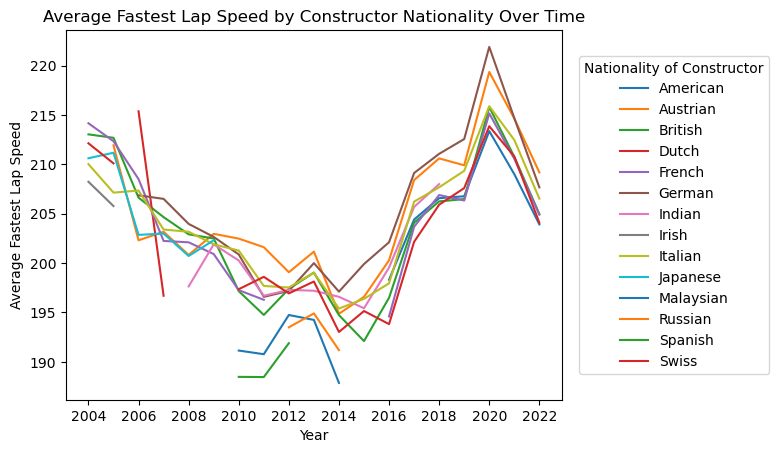

In [103]:
# graph of all constructors

nationalities = avg_lapspeed["nationality"].unique()
nationalities = nationalities.tolist()
nationalities

fig, ax = plt.subplots(1,1)
avg_lapspeed_wide[nationalities].plot(ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.legend(
    title="Nationality of Constructor",
    loc='center left',
    bbox_to_anchor=(1.02, 0.5)
)

ax.set_xlabel("Year")
ax.set_ylabel("Average Fastest Lap Speed")
ax.set_title("Average Fastest Lap Speed by Constructor Nationality Over Time")
plt.show()


This table provides the average fastest lap speed grouped by nationality and then sorted by fastest to slowest. Here, we can see that the Irish Constructor has the average fastest lap speed, followed by America, Germany, and so on. The Constructors who have slower average lap speeds in comparison are India, Russia, Malaysia, and Spain.

In [104]:
# aggregate data - avg fastest lap speed overall by nationality
avg_lapspeed_nat = (all_data.groupby("nationality")
                        .agg(avg_fastestLapSpeed = ('fastestLapSpeed','mean'))
                        .sort_values("avg_fastestLapSpeed",ascending = False))


avg_lapspeed_nat

,avg_fastestLapSpeed
nationality,
Irish,206.937361
American,205.810230
German,205.406513
French,205.007286
Austrian,204.943848
Italian,203.989127
Japanese,203.906109
British,203.046972
Swiss,202.653092


For the second graph, we filtered to include the top 5 fastest nationalities through avg_lapspeed_wide[["Irish", "American", "German", "French", "Austrian"]] after we sorted avg_lapspeed by ascending nationality. The plot here now shows us the top 5 Constructor countries, as indicated by the legend. Our results show us that all 5 Constructors had a steady increase in lap speed from 2016, hit a sharp peak in 2020 for their highest lap speed times, and since then have had a steady decline.

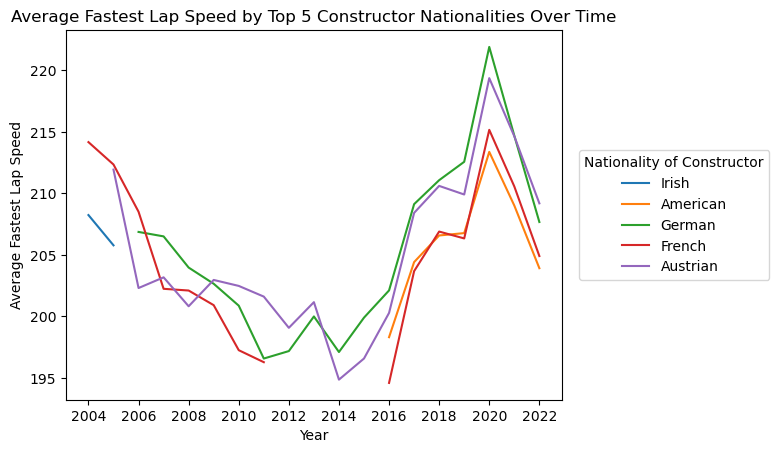

In [105]:
# graph of top 5 constructors in terms of average fastest lap speed

fig, ax = plt.subplots(1,1)
avg_lapspeed_wide[["Irish", "American", "German", "French", "Austrian"]].plot(ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.legend(
    title="Nationality of Constructor",
    loc='center left',
    bbox_to_anchor=(1.02, 0.5)
)

ax.set_xlabel("Year")
ax.set_ylabel("Average Fastest Lap Speed")
ax.set_title("Average Fastest Lap Speed by Top 5 Constructor Nationalities Over Time")
plt.show()

## Discussion

The average fastest lap speed for all constructors, regardless of nationalities, over the years shows a trend that decreased through 2004 to 2015 and drastically increased after with a peak at 2020. This indicated that there may be some global events that have driven the decrease of the speed for the market as a whole during 2004 to 2015. Similarly, global events such as the COVID-19 pandemic could have caused the peak in 2020, in which the pandemic might have caused a pause in development of technology for F1 races. Though the speed of German and Austrian constructors are slightly higher than others constantly throughout the years, Irish constructors were found with the highest average fastest lap speed. This might be attributed to missing data for Irish constructors in all years except 2004 and 2005. While other constructors portrayed a decrease over years 2006 to 2015, there is no data for Irish constructors for the years though they are likely to experience the depreciation as well. This results in the average fastest lap speed for Irish constructors to remain high as the others were averaged with lower values.